# Classifying Chest X-Ray Images (Pneumonia)
### Markowitz Working NB - Convoluted NN

Dataset from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [107]:
import os, shutil
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight

from markowitz_functions import get_images, preprocess_cnn_data, visualize_results_cnn,\
                                get_class_weights, show_misclassfied_images

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading images from local folders

In [108]:
# Filepaths
train_dir = 'chest_xray/train'
# validation_dir = 'chest_xray/val/'
test_dir = 'chest_xray/test/' 

In [109]:
# Check functionality and num images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
train_normal_dir

'chest_xray/train/NORMAL'

In [110]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [111]:
print('There are', len(os.listdir(train_normal_dir)), 'normal images in the training set')
print('There are', len(os.listdir(train_pneumonia_dir)), 'pneumonia images in the training set')

There are 1349 normal images in the training set
There are 3883 pneumonia images in the training set


## cnn1 (first try)

Changed the `preprocess` function to return the `train_generator` and `val_generator`. Now I have to give `train_gen.classes` to `get_class_weights` and `visualize_training_results`.

In [378]:
# Preprocess the data
train_gen_1, val_gen_1 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [113]:
# Get the class weights
class_weights_1 = get_class_weights(train_gen.classes)
class_weights_1

{0: 1.938425925925926, 1: 0.6738010943031864}

In [114]:
# Instatiate model
cnn_model_1 = models.Sequential()

# Add model layers - Using architecture from Canvas 'CNN from Scratch - Lab' to start
cnn_model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_1.add(MaxPooling2D((2, 2)))
cnn_model_1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_1.add(MaxPooling2D((2, 2)))
cnn_model_1.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_1.add(MaxPooling2D((2, 2)))
cnn_model_1.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_1.add(MaxPooling2D((2, 2)))
# Flatten
cnn_model_1.add(Flatten())
# Final Dense layers
cnn_model_1.add(Dense(512, activation='relu'))
cnn_model_1.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_1.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [115]:
# Train the model
history = cnn_model_1.fit(train_gen_1,
                          steps_per_epoch=40, 
                          epochs=15, 
                          validation_data=val_gen_1, 
                          class_weight=class_weights_1,
                          validation_steps=20)

Epoch 1/15
40/40 [==============================] - 142s 4s/step - loss: 1.2026 - acc: 0.5945 - recall: 0.5165 - val_loss: 0.4355 - val_acc: 0.8150 - val_recall: 0.7772
Epoch 2/15
40/40 [==============================] - 142s 4s/step - loss: 0.4043 - acc: 0.8350 - recall: 0.8330 - val_loss: 0.3496 - val_acc: 0.8550 - val_recall: 0.8309
Epoch 3/15
40/40 [==============================] - 142s 4s/step - loss: 0.2633 - acc: 0.8958 - recall: 0.8914 - val_loss: 0.1645 - val_acc: 0.9390 - val_recall: 0.9568
Epoch 4/15
40/40 [==============================] - 145s 4s/step - loss: 0.2125 - acc: 0.9170 - recall: 0.9152 - val_loss: 0.2588 - val_acc: 0.9000 - val_recall: 0.8762
Epoch 5/15
40/40 [==============================] - 155s 4s/step - loss: 0.1846 - acc: 0.9305 - recall: 0.9300 - val_loss: 0.1270 - val_acc: 0.9590 - val_recall: 0.9731
Epoch 6/15
40/40 [==============================] - 148s 4s/step - loss: 0.1522 - acc: 0.9450 - recall: 0.9426 - val_loss: 0.1374 - val_acc: 0.9460 - val_r

In [1]:
cnn_model_1.save('models/cnn_model_1.h5')

NameError: name 'cnn_model_1' is not defined

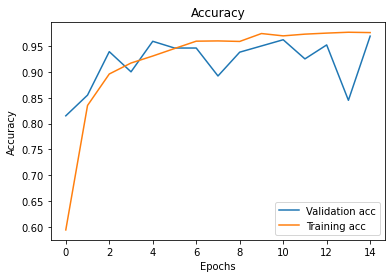

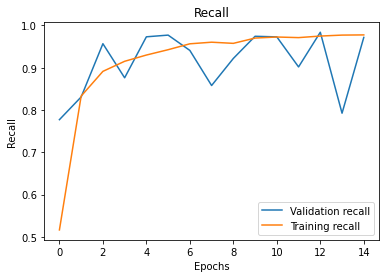

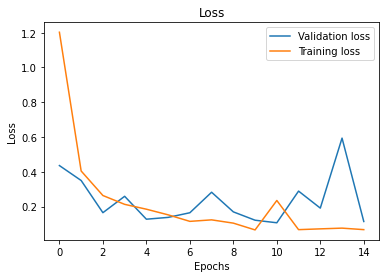

Training eval:
84/84 [==============================] - 70s 830ms/step - loss: 0.0256 - acc: 0.9909 - recall: 0.9891

Validation eval:
21/21 [==============================] - 16s 756ms/step - loss: 0.1112 - acc: 0.9694 - recall: 0.9716


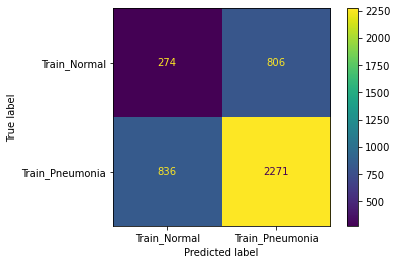

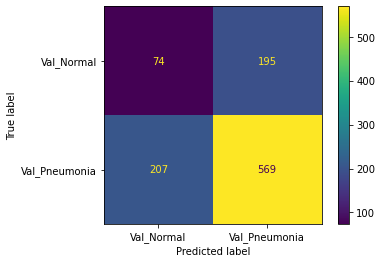

In [120]:
visualize_results_cnn(history, cnn_model_1, train_gen_1, val_gen_1)

In [366]:
val_gen_1.labels[:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [379]:
y_pred = cnn_model_1.predict(val_gen_1)

In [380]:
print(confusion_matrix(val_gen_1.labels, (y_pred>0.5).astype(int)))

[[259  10]
 [ 22 754]]


In [220]:
cnn_model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 128)      

## Visualizing layers using feature maps

https://www.kaggle.com/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn

In [308]:
for layer in cnn_model_1.layers:
    if 'conv' not in layer.name:
        continue
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_20 (3, 3, 1, 32)
conv2d_21 (3, 3, 32, 64)
conv2d_22 (3, 3, 64, 128)
conv2d_23 (3, 3, 128, 128)


In [309]:
filters, bias = cnn_model_1.layers[2].get_weights()

In [310]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

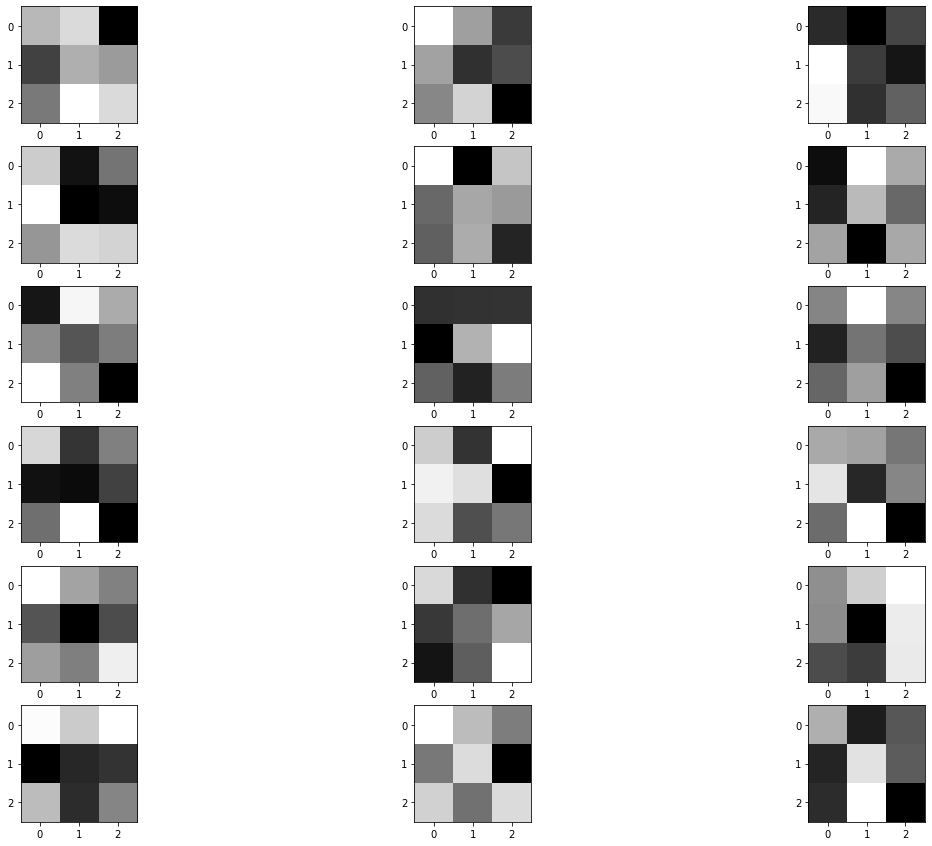

In [313]:
n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()

In [314]:
for i in range(len(cnn_model_1.layers)):
    layer = cnn_model_1.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_20 (None, 254, 254, 32)
2 conv2d_21 (None, 125, 125, 64)
4 conv2d_22 (None, 60, 60, 128)
6 conv2d_23 (None, 28, 28, 128)


In [289]:
model = keras.models.Model(cnn_model_1.inputs, cnn_model_1.layers[0].output)

In [290]:
from keras.preprocessing.image import load_img, img_to_array

In [321]:
images, labels = next(train_gen_1)
image = images[0]

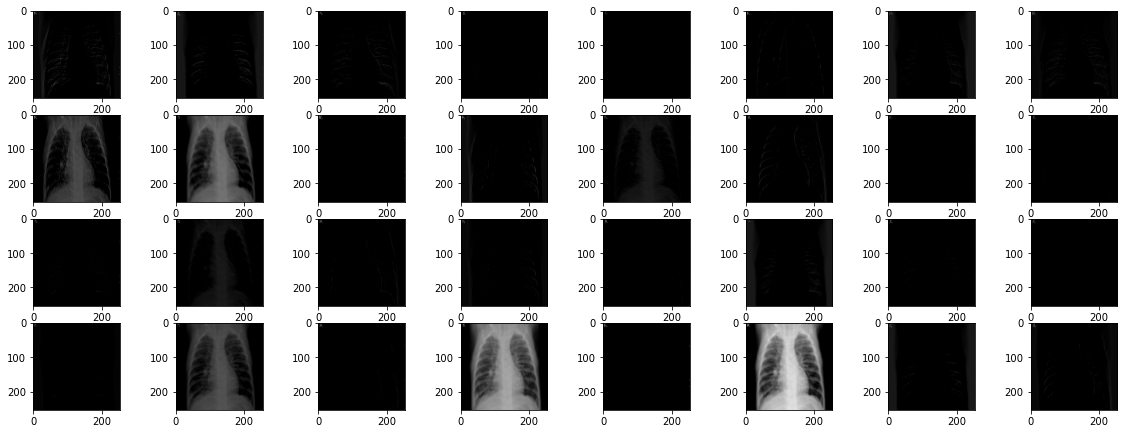

In [322]:
features = model.predict(image.reshape(1, 256, 256))

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

In [323]:
blocks = [0, 2, 4, 6]
outputs = [cnn_model_1.layers[i].output for i in blocks]

model2 = keras.models.Model(cnn_model_1.inputs, outputs)

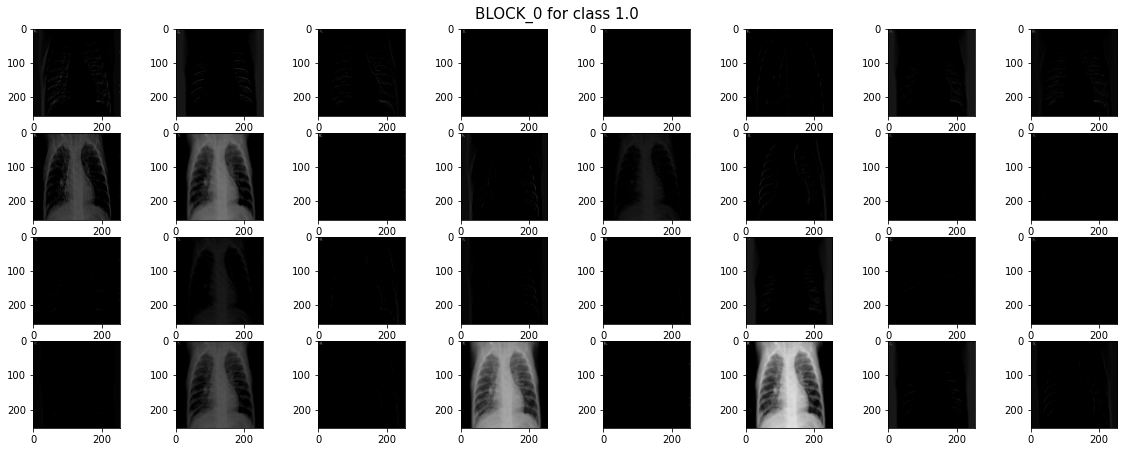

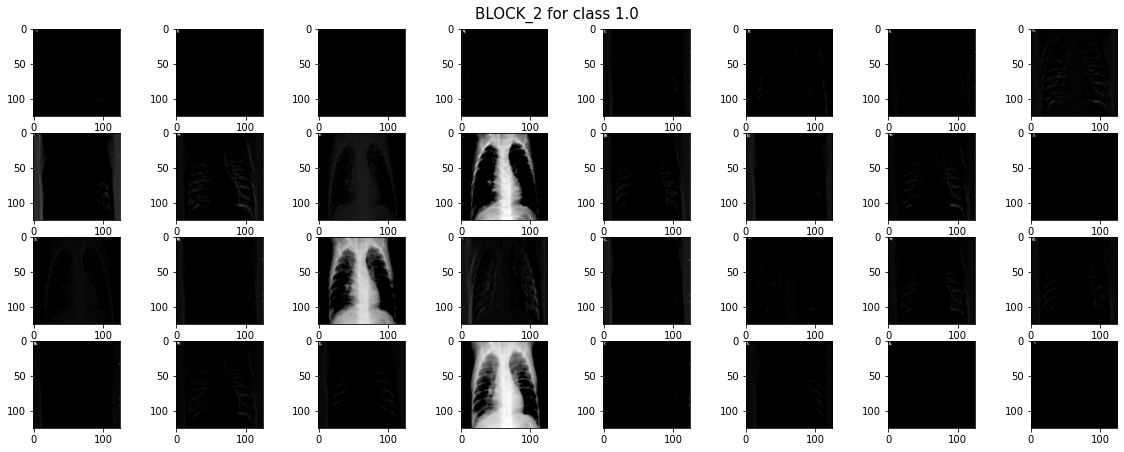

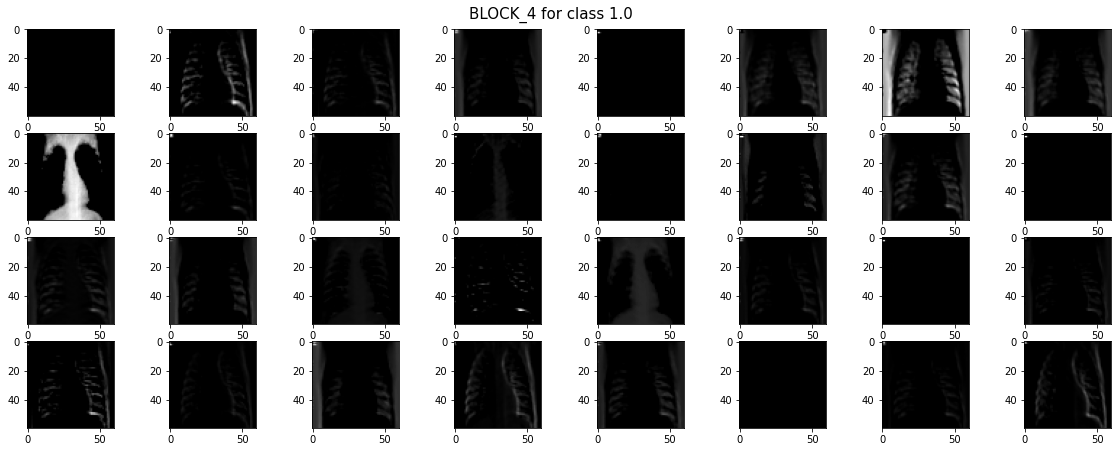

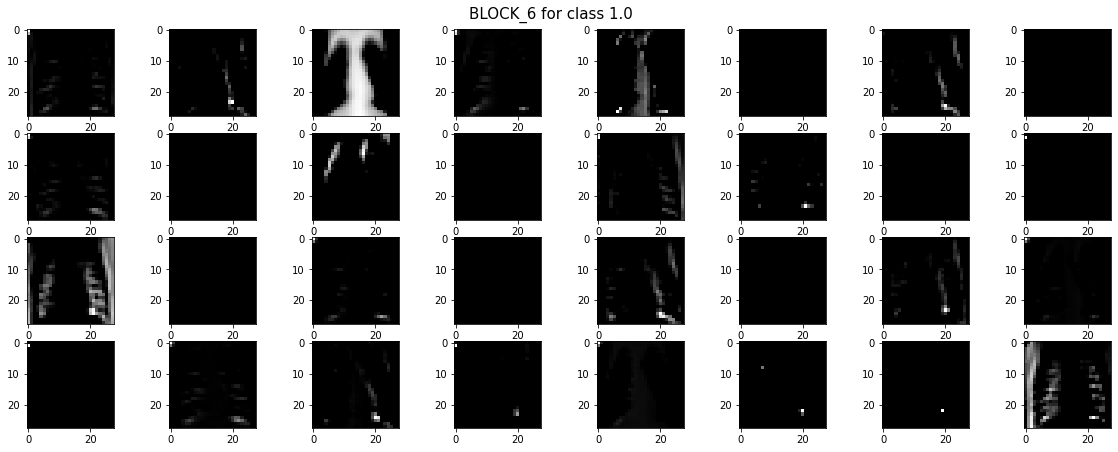

In [324]:
feature_map = model2.predict(image.reshape(1, 256, 256))

for i,fmap in zip(blocks,feature_map):
    fig = plt.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle(f"BLOCK_{i} for class {labels[0]}", fontsize=15, y=0.9)
    for i in range(1,features.shape[3]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
plt.show()

My understanding is that each 'BLOCK' is showing the activation maps from that convolutional layer. In other words, it's showing what the model is 'seeing' after the filters are applied to the image. I think.

It looks like the first convolutional layer is identifying the rib cage/chest as a whole, then each successive layer is finding more and more granular details in the images.

## Trying with Lime (again)

Couldn't get it to work before because of frustrating array size issues, but may have figured it out.

In [325]:
import lime
from lime import lime_image

In [326]:
explainer = lime_image.LimeImageExplainer()

In [361]:
def new_predict_fn(image):
    return cnn_model_1.predict(image.reshape(256, 256, 1))

In [359]:
image.shape

(256, 256, 1)

In [362]:
explanation = explainer.explain_instance(image.reshape(256, 256).astype('double'), new_predict_fn)

ValueError: cannot reshape array of size 1966080 into shape (256,256,1)

## cnn2

Using `BatchNormalization` layers

In [64]:
# Preprocess the data
train_gen_2, val_gen_2 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [81]:
# Get the class weights
class_weights_2 = get_class_weights(train_gen_2.classes)
class_weights_2

{0: 1.938425925925926, 1: 0.6738010943031864}

In [65]:
# Instatiate model
cnn_model_2 = models.Sequential()

# Input layer
cnn_model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_2.add(MaxPooling2D((2, 2)))
cnn_model_2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_2.add(Conv2D(128, (3, 3), use_bias=False))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Activation('relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_2.add(Flatten())
# Final Dense layers
cnn_model_2.add(Dense(512, activation='relu'))
cnn_model_2.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [66]:
# Train the model
history = cnn_model_2.fit(train_gen_2,
                          steps_per_epoch=40, 
                          epochs=20, 
                          class_weight=class_weights_2
                          validation_data=val_gen_2, 
                          validation_steps=20)

Epoch 1/20
40/40 [==============================] - 153s 4s/step - loss: 3.9770 - acc: 0.8405 - recall: 0.8899 - val_loss: 0.6355 - val_acc: 0.7390 - val_recall: 1.0000
Epoch 2/20
40/40 [==============================] - 150s 4s/step - loss: 0.0973 - acc: 0.9643 - recall: 0.9783 - val_loss: 0.6180 - val_acc: 0.8740 - val_recall: 0.9987
Epoch 3/20
40/40 [==============================] - 147s 4s/step - loss: 0.0806 - acc: 0.9695 - recall: 0.9825 - val_loss: 0.5834 - val_acc: 0.8560 - val_recall: 1.0000
Epoch 4/20
40/40 [==============================] - 188s 5s/step - loss: 0.0557 - acc: 0.9774 - recall: 0.9858 - val_loss: 0.5649 - val_acc: 0.9610 - val_recall: 0.9623
Epoch 5/20
40/40 [==============================] - 157s 4s/step - loss: 0.0502 - acc: 0.9834 - recall: 0.9884 - val_loss: 0.5200 - val_acc: 0.9680 - val_recall: 0.9852
Epoch 6/20
40/40 [==============================] - 148s 4s/step - loss: 0.0363 - acc: 0.9879 - recall: 0.9911 - val_loss: 0.4746 - val_acc: 0.9430 - val_r

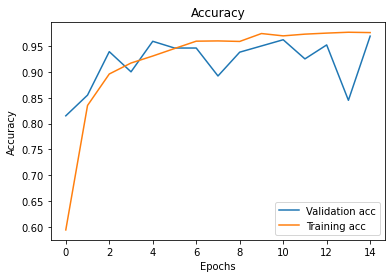

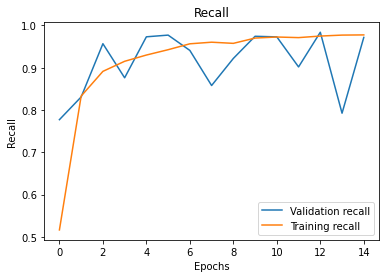

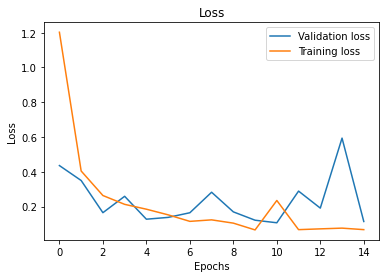

Training eval:
14/84 [====>.........................] - ETA: 54s - loss: 0.0017 - acc: 1.0000 - recall: 1.0000

KeyboardInterrupt: 

In [117]:
visualize_results_cnn(history, cnn_model_2, train_gen_2, val_gen_2)

In [ ]:
cnn_model_2.save('models/cnn_model_2.h5')

Wtf? How is the accuracy/recall score given by `.evaluate()` so high, and yet the scores shown in the confusion matrix are such garbage? Something is seriously off here.

## cnn3

Adding more Dense layers at the end

In [160]:
# Preprocess the data
train_gen_3, val_gen_3 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [161]:
# Get the class weights
class_weights_3 = get_class_weights(train_gen_3.classes)
class_weights_3

{0: 1.938425925925926, 1: 0.6738010943031864}

In [162]:
# Instatiate model
cnn_model_3 = models.Sequential()

# Input layer
cnn_model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_3.add(MaxPooling2D((2, 2)))
cnn_model_3.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_3.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_3.add(Conv2D(128, (3, 3), use_bias=False))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(Activation('relu'))
cnn_model_3.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_3.add(Flatten())
# Final Dense layers
cnn_model_3.add(Dense(512, activation='relu'))
cnn_model_3.add(Dense(64, activation='relu'))
cnn_model_3.add(Dense(32, activation='relu'))
cnn_model_3.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_3.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [165]:
# Train the model
history_3 = cnn_model_3.fit(train_gen_3,
                            steps_per_epoch=40, 
                            epochs=30, 
                            class_weight=class_weights_3,
                            validation_data=val_gen_3, 
                            validation_steps=20)

Epoch 1/30
40/40 [==============================] - 119s 3s/step - loss: 1.6175 - acc: 0.7845 - recall: 0.7764 - val_loss: 0.6401 - val_acc: 0.9210 - val_recall: 0.9181
Epoch 2/30
40/40 [==============================] - 126s 3s/step - loss: 0.1459 - acc: 0.9456 - recall: 0.9447 - val_loss: 0.6289 - val_acc: 0.9500 - val_recall: 0.9489
Epoch 3/30
40/40 [==============================] - 153s 4s/step - loss: 0.0892 - acc: 0.9670 - recall: 0.9639 - val_loss: 0.5768 - val_acc: 0.9220 - val_recall: 0.8981
Epoch 4/30
40/40 [==============================] - 118s 3s/step - loss: 0.0911 - acc: 0.9683 - recall: 0.9662 - val_loss: 0.5527 - val_acc: 0.9410 - val_recall: 0.9920
Epoch 5/30
40/40 [==============================] - 112s 3s/step - loss: 0.0712 - acc: 0.9730 - recall: 0.9721 - val_loss: 0.5211 - val_acc: 0.9620 - val_recall: 0.9652
Epoch 6/30
40/40 [==============================] - 112s 3s/step - loss: 0.0602 - acc: 0.9758 - recall: 0.9741 - val_loss: 0.5056 - val_acc: 0.9530 - val_r

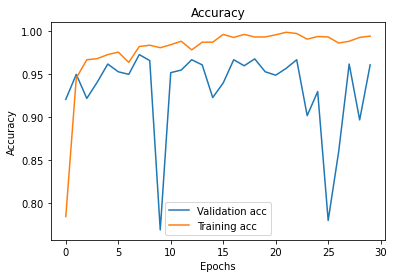

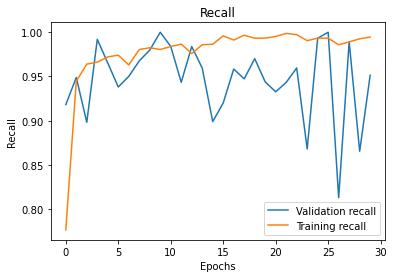

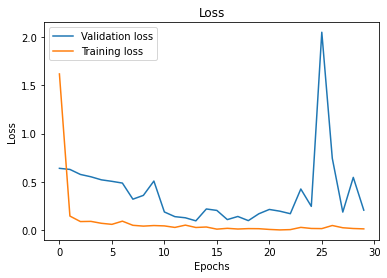

Training eval:
84/84 [==============================] - 51s 603ms/step - loss: 0.0277 - acc: 0.9897 - recall: 0.9862

Validation eval:
21/21 [==============================] - 12s 574ms/step - loss: 0.2315 - acc: 0.9589 - recall: 0.9485


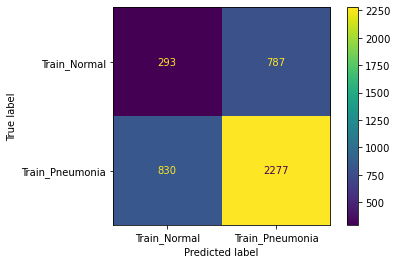

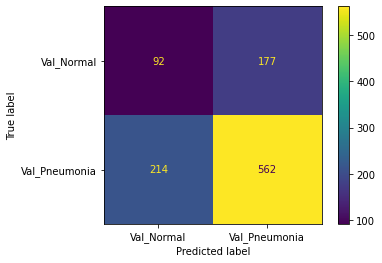

In [166]:
visualize_results_cnn(history_3, cnn_model_3, train_gen_3, val_gen_3)

In [ ]:
cnn_model_3.save('models/cnn_model_3.h5')

## cnn4

Fiddling with filter size

In [381]:
# Preprocess the data
train_gen_4, val_gen_4 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [168]:
# Get the class weights
class_weights_4 = get_class_weights(train_gen_4.classes)
class_weights_4

{0: 1.938425925925926, 1: 0.6738010943031864}

In [173]:
# Instatiate model
cnn_model_4 = models.Sequential()

# Input layer
cnn_model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_4.add(MaxPooling2D((2, 2)))
cnn_model_4.add(Conv2D(64, (5, 5), activation='relu'))
cnn_model_4.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_4.add(Conv2D(128, (5, 5), use_bias=False))
cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Activation('relu'))
cnn_model_4.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_4.add(Flatten())
# Final Dense layers
cnn_model_4.add(Dense(512, activation='relu'))
cnn_model_4.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_4.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [174]:
# Train the model
history_4 = cnn_model_4.fit(train_gen_4,
                            steps_per_epoch=40, 
                            epochs=30, 
                            class_weight=class_weights_4,
                            validation_data=val_gen_4, 
                            validation_steps=20)

Epoch 1/30
40/40 [==============================] - 176s 4s/step - loss: 2.7438 - acc: 0.8230 - recall: 0.8250 - val_loss: 0.5916 - val_acc: 0.7470 - val_recall: 1.0000
Epoch 2/30
40/40 [==============================] - 175s 4s/step - loss: 0.1291 - acc: 0.9520 - recall: 0.9547 - val_loss: 0.6184 - val_acc: 0.7500 - val_recall: 1.0000
Epoch 3/30
40/40 [==============================] - 178s 4s/step - loss: 0.1240 - acc: 0.9520 - recall: 0.9496 - val_loss: 0.6008 - val_acc: 0.7450 - val_recall: 1.0000
Epoch 4/30
40/40 [==============================] - 179s 4s/step - loss: 0.0959 - acc: 0.9695 - recall: 0.9683 - val_loss: 0.5845 - val_acc: 0.7490 - val_recall: 1.0000
Epoch 5/30
40/40 [==============================] - 174s 4s/step - loss: 0.0651 - acc: 0.9775 - recall: 0.9774 - val_loss: 0.5028 - val_acc: 0.8570 - val_recall: 0.9986
Epoch 6/30
40/40 [==============================] - 174s 4s/step - loss: 0.0749 - acc: 0.9738 - recall: 0.9718 - val_loss: 0.4486 - val_acc: 0.8990 - val_r

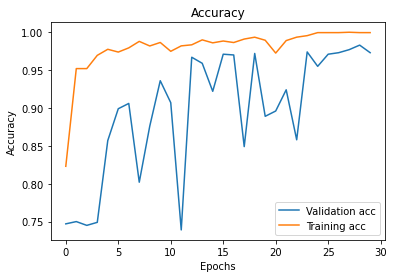

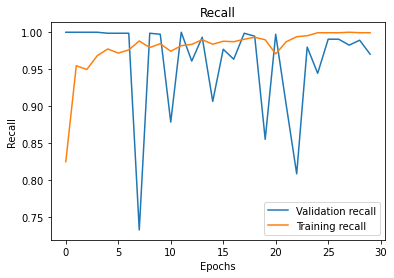

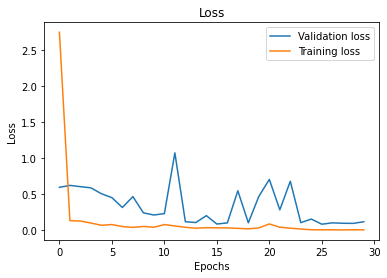

Training eval:
84/84 [==============================] - 101s 1s/step - loss: 0.0020 - acc: 0.9995 - recall: 0.9994

Validation eval:
21/21 [==============================] - 22s 1s/step - loss: 0.1099 - acc: 0.9742 - recall: 0.9716


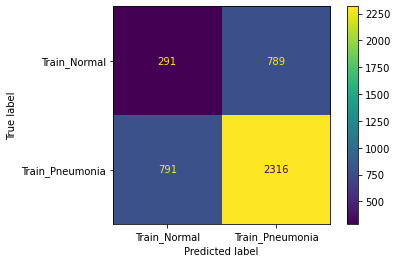

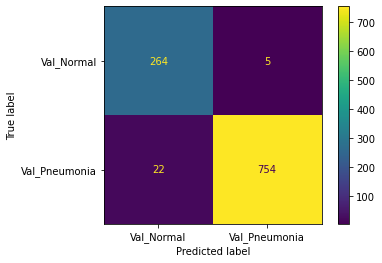

In [382]:
visualize_results_cnn(history_4, cnn_model_4, train_gen_4, val_gen_4)

In [176]:
cnn_model_4.save('models/cnn_model_4.h5')

In [221]:
cnn_model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 123, 123, 64)      51264     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 57, 57, 128)       204800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 57, 57, 128)       512       
_________________________________________________________________
activation_4 (Activation)    (None, 57, 57, 128)     

In [470]:
cnn_model_4.evaluate(test_generator)

20/20 [==============================] - 22s 1s/step - loss: 0.1028 - acc: 0.9790 - recall: 0.9808


[0.10278427600860596, 0.9789999723434448, 0.9808481335639954]

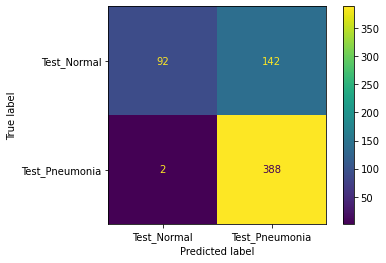

In [469]:
# Visualize with confusion matrix
preds = (cnn_model_4.predict(test_generator) > 0.5).astype('int32')

ConfusionMatrixDisplay(confusion_matrix(test_generator.labels, preds),
                       display_labels=['Test_Normal', 'Test_Pneumonia']).plot();

In [453]:
cnn_model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 123, 123, 64)      51264     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 57, 57, 128)       204800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 57, 57, 128)       512       
_________________________________________________________________
activation_4 (Activation)    (None, 57, 57, 128)     

Very strange that the current version of this model in the nb is performing so much better than the loaded/previously-saved version. Something must have happened to it--perhaps an accidental re-training while running later models?

In [454]:
cnn_model_4.save('models/cnn_model_4_modified_unknown.h5')

## cnn5

Maybe *not* using `class_weight` will help with recall since it's biased in favor of the target class? Let's also introduce L2 regularization to avoid overfitting.

In [385]:
# Preprocess the data
train_gen_5, val_gen_5 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [386]:
# Instatiate model
cnn_model_5 = models.Sequential()

# Input layer
cnn_model_5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_5.add(MaxPooling2D((2, 2)))
cnn_model_5.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_5.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_5.add(Conv2D(128, (5, 5), use_bias=False))
cnn_model_5.add(BatchNormalization())
cnn_model_5.add(Activation('relu'))
cnn_model_5.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_5.add(Flatten())
# Final Dense layers
cnn_model_5.add(Dense(512, activation='relu'))
cnn_model_5.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_5.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [387]:
# Train the model
history_5 = cnn_model_5.fit(train_gen_5,
                            steps_per_epoch=40, 
                            epochs=30, 
                            validation_data=val_gen_5, 
                            validation_steps=20)

Epoch 1/30
40/40 [==============================] - 183s 5s/step - loss: 2.6198 - acc: 0.8695 - recall: 0.9170 - val_loss: 0.8694 - val_acc: 0.8200 - val_recall: 0.7715
Epoch 2/30
40/40 [==============================] - 241s 6s/step - loss: 0.3363 - acc: 0.9623 - recall: 0.9809 - val_loss: 0.7995 - val_acc: 0.8650 - val_recall: 0.9932
Epoch 3/30
40/40 [==============================] - 246s 6s/step - loss: 0.3658 - acc: 0.9335 - recall: 0.9538 - val_loss: 0.7684 - val_acc: 0.7690 - val_recall: 0.9918
Epoch 4/30
40/40 [==============================] - 239s 6s/step - loss: 0.2623 - acc: 0.9610 - recall: 0.9768 - val_loss: 0.6499 - val_acc: 0.9370 - val_recall: 0.9891
Epoch 5/30
40/40 [==============================] - 234s 6s/step - loss: 0.2894 - acc: 0.9545 - recall: 0.9704 - val_loss: 0.5922 - val_acc: 0.8260 - val_recall: 0.9986
Epoch 6/30
40/40 [==============================] - 247s 6s/step - loss: 0.3574 - acc: 0.9492 - recall: 0.9656 - val_loss: 0.7214 - val_acc: 0.7310 - val_r

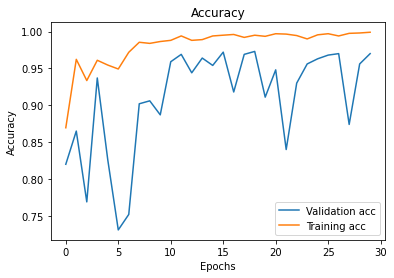

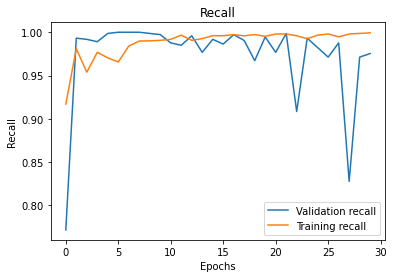

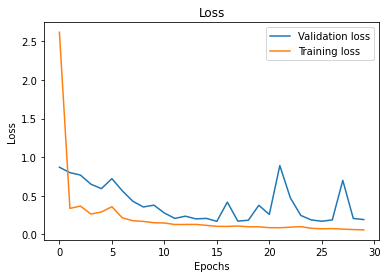

Training eval:
84/84 [==============================] - 100s 1s/step - loss: 0.0545 - acc: 1.0000 - recall: 1.0000

Validation eval:
21/21 [==============================] - 23s 1s/step - loss: 0.1931 - acc: 0.9703 - recall: 0.9755


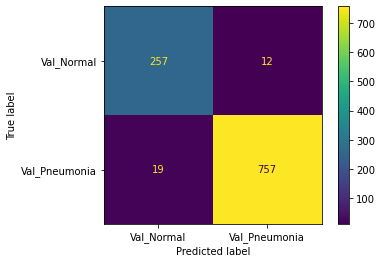

In [388]:
visualize_results_cnn(history_5, cnn_model_5, train_gen_5, val_gen_5)

In [389]:
cnn_model_5.save('models/cnn_model_5.h5')

In [390]:
cnn_model_5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 123, 123, 64)      51264     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 57, 57, 128)       204800    
_________________________________________________________________
batch_normalization_5 (Batch (None, 57, 57, 128)       512       
_________________________________________________________________
activation_5 (Activation)    (None, 57, 57, 128)     

Definitely an improvement, but still overfit. It looked like during training the scores were consistently high (val recall above 99%) until around epoch 20--so including an early stopping function will probably help prevent overfitting from overtraining.

## cnn6

Fewer epochs to prevent overfitting! Choosing this strategy over using something like a callback function (`EarlyStopping`, e.g.) because the scores aren't plateauing so much as worsening due to overtraining/overfitting.

In [400]:
# Preprocess the data
train_gen_6, val_gen_6 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [401]:
# Instatiate model
cnn_model_6 = models.Sequential()

# Input layer
cnn_model_6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_6.add(MaxPooling2D((2, 2)))
cnn_model_6.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_6.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_6.add(Conv2D(128, (5, 5), use_bias=False))
cnn_model_6.add(BatchNormalization())
cnn_model_6.add(Activation('relu'))
cnn_model_6.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_6.add(Flatten())
# Final Dense layers
cnn_model_6.add(Dense(512, activation='relu'))
cnn_model_6.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_6.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [405]:
# Train the model with only 20 epochs this time
history_6 = cnn_model_6.fit(train_gen_6,
                            steps_per_epoch=40, 
                            epochs=20, 
                            validation_data=val_gen_6, 
                            validation_steps=20)

Epoch 1/20
40/40 [==============================] - 203s 5s/step - loss: 2.8632 - acc: 0.8455 - recall: 0.9016 - val_loss: 0.8589 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 2/20
40/40 [==============================] - 194s 5s/step - loss: 0.3285 - acc: 0.9600 - recall: 0.9741 - val_loss: 0.6990 - val_acc: 0.7320 - val_recall: 1.0000
Epoch 3/20
40/40 [==============================] - 188s 5s/step - loss: 0.3264 - acc: 0.9490 - recall: 0.9691 - val_loss: 0.6456 - val_acc: 0.7330 - val_recall: 1.0000
Epoch 4/20
40/40 [==============================] - 184s 5s/step - loss: 0.3234 - acc: 0.9550 - recall: 0.9717 - val_loss: 0.6342 - val_acc: 0.8370 - val_recall: 0.9986
Epoch 5/20
40/40 [==============================] - 184s 5s/step - loss: 0.2636 - acc: 0.9635 - recall: 0.9711 - val_loss: 0.6868 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 6/20
40/40 [==============================] - 184s 5s/step - loss: 0.2243 - acc: 0.9725 - recall: 0.9804 - val_loss: 0.5748 - val_acc: 0.8690 - val_r

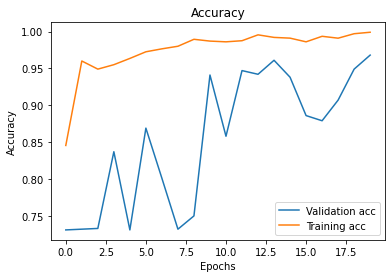

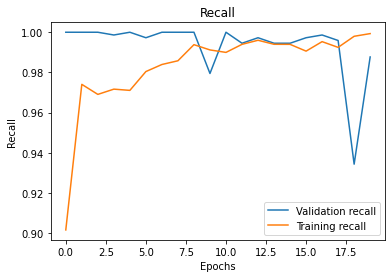

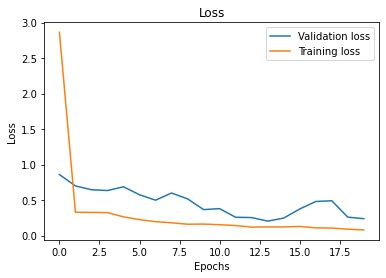

Training eval:
84/84 [==============================] - 74s 884ms/step - loss: 0.1227 - acc: 0.9864 - recall: 0.9994

Validation eval:
21/21 [==============================] - 18s 850ms/step - loss: 0.2304 - acc: 0.9694 - recall: 0.9884


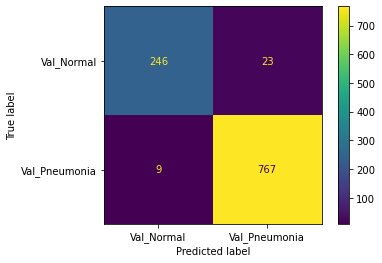

In [406]:
visualize_results_cnn(history_6, cnn_model_6, train_gen_6, val_gen_6)

In [413]:
cnn_model_6.save('models/cnn_model_6.h5')

Best yet! Less overfit, but still seems like maybe even fewer epochs would be better (like 15?). Worried about *underfitting* though since the accuracy is pretty low for those first few epochs, even with sky-high recall. I think that just means that it's predicting Pneumonia for basically every image.

## cnn7

Trying same as cnn6 basically, but using `EarlyStopping` just to see.

In [402]:
from keras.callbacks import EarlyStopping

In [404]:
es = EarlyStopping(monitor='val_recall', 
                   min_delta=0.001,
                   patience=3,
                   baseline=0.98,
                   restore_best_weights=True,
                   verbose=1)

In [407]:
# Preprocess the data
train_gen_7, val_gen_7 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [408]:
# Instatiate model
cnn_model_7 = models.Sequential()

# Input layer
cnn_model_7.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_7.add(MaxPooling2D((2, 2)))
cnn_model_7.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_7.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_7.add(Conv2D(128, (5, 5), use_bias=False))
cnn_model_7.add(BatchNormalization())
cnn_model_7.add(Activation('relu'))
cnn_model_7.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_7.add(Flatten())
# Final Dense layers
cnn_model_7.add(Dense(512, activation='relu'))
cnn_model_7.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_7.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [409]:
# Train the model with 30 epochs, but with EarlyStopping callback
history_7 = cnn_model_7.fit(train_gen_7,
                            steps_per_epoch=40, 
                            epochs=20, 
                            callbacks=[es],
                            validation_data=val_gen_7, 
                            validation_steps=20)

Epoch 1/20
40/40 [==============================] - 180s 5s/step - loss: 3.6147 - acc: 0.7489 - recall: 0.8240 - val_loss: 0.8625 - val_acc: 0.7720 - val_recall: 0.9781
Epoch 2/20
40/40 [==============================] - 179s 4s/step - loss: 0.3347 - acc: 0.9436 - recall: 0.9642 - val_loss: 0.7460 - val_acc: 0.7500 - val_recall: 0.9986
Epoch 3/20
40/40 [==============================] - 179s 4s/step - loss: 0.2582 - acc: 0.9605 - recall: 0.9734 - val_loss: 0.7452 - val_acc: 0.9340 - val_recall: 0.9863
Epoch 4/20
40/40 [==============================] - 179s 4s/step - loss: 0.2293 - acc: 0.9658 - recall: 0.9780 - val_loss: 0.6357 - val_acc: 0.8890 - val_recall: 0.9959
Epoch 00004: early stopping


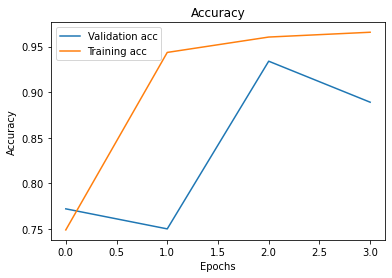

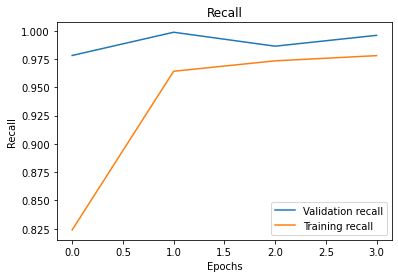

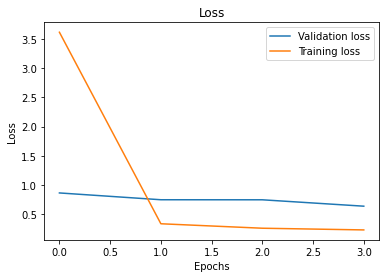

Training eval:
84/84 [==============================] - 73s 872ms/step - loss: 0.8619 - acc: 0.8032 - recall: 0.9903

Validation eval:
21/21 [==============================] - 18s 838ms/step - loss: 0.8609 - acc: 0.7818 - recall: 0.9794


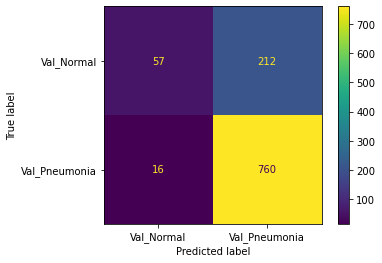

In [410]:
visualize_results_cnn(history_7, cnn_model_7, train_gen_7, val_gen_7)

Well, that didn't work. It stopped after 3 epochs with high recall, sure, but garbage level precision and accuracy.

## cnn8

Same as cnn6, but only to 15 epochs.

In [411]:
# Preprocess the data
train_gen_8, val_gen_8 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [412]:
# Instatiate model
cnn_model_8 = models.Sequential()

# Input layer
cnn_model_8.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_8.add(MaxPooling2D((2, 2)))
cnn_model_8.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_8.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_8.add(Conv2D(128, (5, 5), use_bias=False))
cnn_model_8.add(BatchNormalization())
cnn_model_8.add(Activation('relu'))
cnn_model_8.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_8.add(Flatten())
# Final Dense layers
cnn_model_8.add(Dense(512, activation='relu'))
cnn_model_8.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_8.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [415]:
# Train the model with only 20 epochs this time
history_8 = cnn_model_8.fit(train_gen_8,
                            steps_per_epoch=40, 
                            epochs=15, 
                            validation_data=val_gen_8, 
                            validation_steps=20)

Epoch 1/15
40/40 [==============================] - 271s 7s/step - loss: 2.8279 - acc: 0.8450 - recall: 0.8878 - val_loss: 0.8447 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 2/15
40/40 [==============================] - 238s 6s/step - loss: 0.3229 - acc: 0.9477 - recall: 0.9675 - val_loss: 0.8272 - val_acc: 0.8840 - val_recall: 0.9590
Epoch 3/15
40/40 [==============================] - 238s 6s/step - loss: 0.2594 - acc: 0.9600 - recall: 0.9733 - val_loss: 0.7703 - val_acc: 0.8330 - val_recall: 0.9973
Epoch 4/15
40/40 [==============================] - 245s 6s/step - loss: 0.4146 - acc: 0.9095 - recall: 0.9396 - val_loss: 0.8475 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 5/15
40/40 [==============================] - 251s 6s/step - loss: 0.5452 - acc: 0.8540 - recall: 0.9319 - val_loss: 0.8757 - val_acc: 0.3350 - val_recall: 0.0903
Epoch 6/15
40/40 [==============================] - 224s 6s/step - loss: 0.3961 - acc: 0.8893 - recall: 0.9235 - val_loss: 0.5347 - val_acc: 0.8890 - val_r

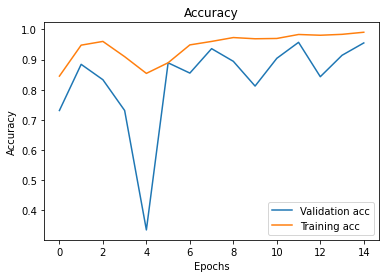

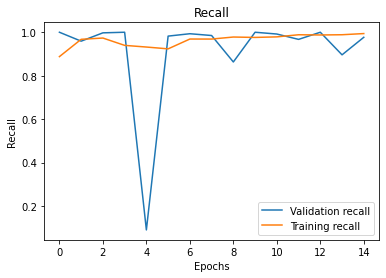

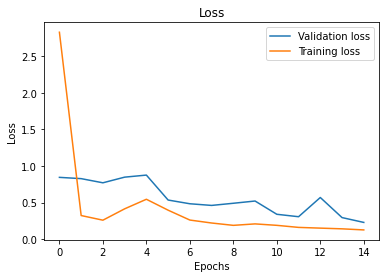

Training eval:
84/84 [==============================] - 94s 1s/step - loss: 0.1664 - acc: 0.9873 - recall: 0.9942

Validation eval:
21/21 [==============================] - 22s 1s/step - loss: 0.2263 - acc: 0.9560 - recall: 0.9768


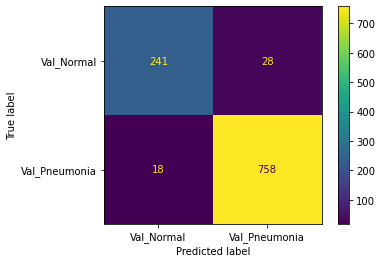

In [416]:
visualize_results_cnn(history_8, cnn_model_8, train_gen_8, val_gen_8)

## cnn9

Same as cnn6, but now will `class_weight` added back in to ensure fidelity on unseen data (don't want false positives to outnumber true negatives). Bumping epochs back up to 30.

In [460]:
# Preprocess the data
train_gen_9, val_gen_9 = preprocess_cnn_data(train_dir, batch_size=50)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [461]:
# Get the class weights
class_weights_9 = get_class_weights(train_gen_9.classes)
class_weights_9

{0: 1.938425925925926, 1: 0.6738010943031864}

In [462]:
# Instatiate model
cnn_model_9 = models.Sequential()

# Input layer
cnn_model_9.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_9.add(MaxPooling2D((2, 2)))
cnn_model_9.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_9.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_9.add(Conv2D(128, (5, 5), use_bias=False))
cnn_model_9.add(BatchNormalization())
cnn_model_9.add(Activation('relu'))
cnn_model_9.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_9.add(Flatten())
# Final Dense layers
cnn_model_9.add(Dense(512, activation='relu'))
cnn_model_9.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_9.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [463]:
# Train the model with 20 epochs and class_weight
history_9 = cnn_model_9.fit(train_gen_9,
                            steps_per_epoch=40, 
                            epochs=30, 
                            class_weight=class_weights_9,
                            validation_data=val_gen_9, 
                            validation_steps=20)

Epoch 1/30
40/40 [==============================] - 269s 7s/step - loss: 2.6378 - acc: 0.7590 - recall: 0.7487 - val_loss: 0.8459 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 2/30
40/40 [==============================] - 249s 6s/step - loss: 0.3587 - acc: 0.9315 - recall: 0.9296 - val_loss: 0.7349 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 3/30
40/40 [==============================] - 243s 6s/step - loss: 0.2667 - acc: 0.9542 - recall: 0.9551 - val_loss: 0.6895 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 4/30
40/40 [==============================] - 272s 7s/step - loss: 0.2214 - acc: 0.9640 - recall: 0.9628 - val_loss: 0.6661 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 5/30
40/40 [==============================] - 270s 7s/step - loss: 0.1915 - acc: 0.9698 - recall: 0.9678 - val_loss: 0.6557 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 6/30
40/40 [==============================] - 251s 6s/step - loss: 0.2198 - acc: 0.9643 - recall: 0.9635 - val_loss: 0.5072 - val_acc: 0.7790 - val_r

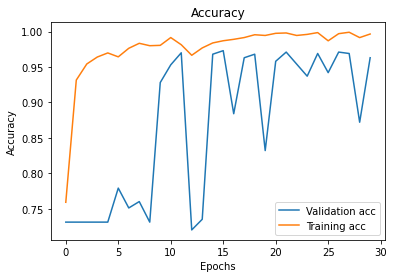

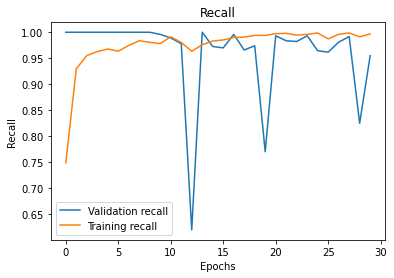

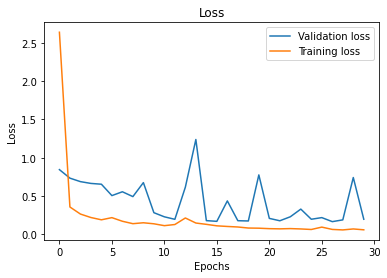

Training eval:
84/84 [==============================] - 78s 926ms/step - loss: 0.0622 - acc: 0.9969 - recall: 0.9958

Validation eval:
21/21 [==============================] - 19s 899ms/step - loss: 0.1948 - acc: 0.9636 - recall: 0.9562


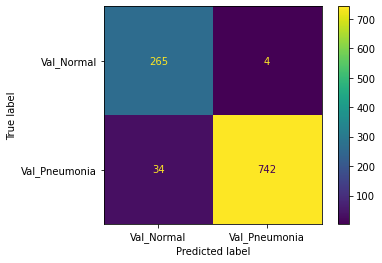

In [464]:
visualize_results_cnn(history_9, cnn_model_9, train_gen_9, val_gen_9)

In [465]:
cnn_model_9.evaluate(test_generator)

13/13 [==============================] - 10s 787ms/step - loss: 1.7974 - acc: 0.7853 - recall: 0.9821


[1.7974092960357666, 0.7852563858032227, 0.9820512533187866]

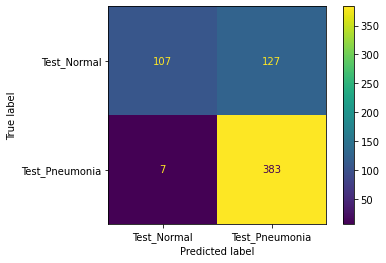

In [466]:
# Visualize with confusion matrix
preds = (cnn_model_9.predict(test_generator) > 0.5).astype('int32')

ConfusionMatrixDisplay(confusion_matrix(test_generator.labels, preds),
                       display_labels=['Test_Normal', 'Test_Pneumonia']).plot();

In [467]:
cnn_model_9.save('models/cnn_model_9.h5')

## cnn10

Same as cnn9, epochs down to 25

In [471]:
# Preprocess the data
train_gen_10, val_gen_10 = preprocess_cnn_data(train_dir, batch_size=50)

# Get the class weights
class_weights_10 = get_class_weights(train_gen_10.classes)
class_weights_10

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


{0: 1.938425925925926, 1: 0.6738010943031864}

In [472]:
# Instatiate model
cnn_model_10 = models.Sequential()

# Input layer
cnn_model_10.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
cnn_model_10.add(MaxPooling2D((2, 2)))
cnn_model_10.add(Conv2D(64, (5, 5), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_10.add(MaxPooling2D((2, 2)))
# BatchNormalization layer
cnn_model_10.add(Conv2D(128, (5, 5), use_bias=False))
cnn_model_10.add(BatchNormalization())
cnn_model_10.add(Activation('relu'))
cnn_model_10.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_10.add(Flatten())
# Final Dense layers
cnn_model_10.add(Dense(512, activation='relu'))
cnn_model_10.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_10.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall'])

In [473]:
# Train the model with 20 epochs and class_weight
history_10 = cnn_model_10.fit(train_gen_10,
                            steps_per_epoch=40, 
                            epochs=25, 
                            class_weight=class_weights_10,
                            validation_data=val_gen_10, 
                            validation_steps=20)

Epoch 1/25
40/40 [==============================] - 184s 5s/step - loss: 3.9792 - acc: 0.7755 - recall: 0.7643 - val_loss: 0.7873 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 2/25
40/40 [==============================] - 175s 4s/step - loss: 0.3856 - acc: 0.9346 - recall: 0.9349 - val_loss: 0.7553 - val_acc: 0.7310 - val_recall: 1.0000
Epoch 3/25
40/40 [==============================] - 171s 4s/step - loss: 0.3062 - acc: 0.9477 - recall: 0.9466 - val_loss: 0.7641 - val_acc: 0.7910 - val_recall: 0.9973
Epoch 4/25
40/40 [==============================] - 173s 4s/step - loss: 0.2382 - acc: 0.9650 - recall: 0.9622 - val_loss: 0.5856 - val_acc: 0.8110 - val_recall: 0.9986
Epoch 5/25
40/40 [==============================] - 171s 4s/step - loss: 0.2445 - acc: 0.9618 - recall: 0.9605 - val_loss: 0.6464 - val_acc: 0.7500 - val_recall: 0.9986
Epoch 6/25
40/40 [==============================] - 172s 4s/step - loss: 0.2411 - acc: 0.9655 - recall: 0.9631 - val_loss: 0.5831 - val_acc: 0.7590 - val_r

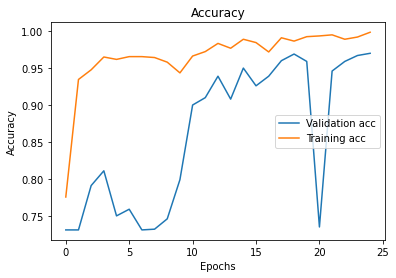

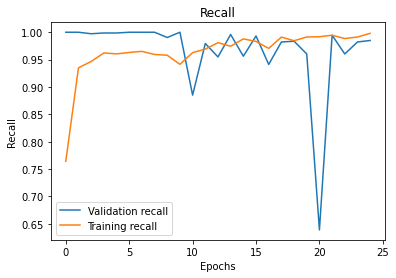

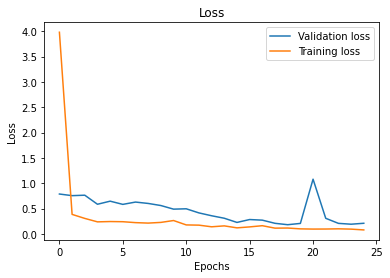

Training eval:
84/84 [==============================] - 84s 1s/step - loss: 0.0787 - acc: 0.9986 - recall: 1.0000

Validation eval:
21/21 [==============================] - 19s 918ms/step - loss: 0.2043 - acc: 0.9713 - recall: 0.9858


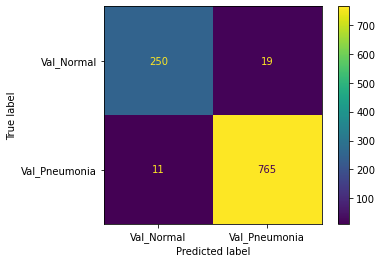

In [474]:
visualize_results_cnn(history_10, cnn_model_10, train_gen_10, val_gen_10)

In [475]:
cnn_model_10.evaluate(test_generator)

13/13 [==============================] - 10s 798ms/step - loss: 2.4519 - acc: 0.7324 - recall: 0.9949


[2.451915740966797, 0.7323718070983887, 0.9948717951774597]

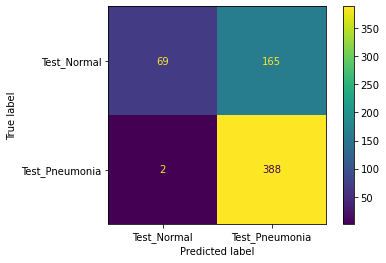

In [476]:
# Visualize with confusion matrix
preds = (cnn_model_10.predict(test_generator) > 0.5).astype('int32')

ConfusionMatrixDisplay(confusion_matrix(test_generator.labels, preds),
                       display_labels=['Test_Normal', 'Test_Pneumonia']).plot();

## Evaluating Best Model on Test Set

In [477]:
# Load model
best_model = models.load_model('models/cnn_model_9.h5')

In [478]:
best_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 123, 123, 64)      51264     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 57, 57, 128)       204800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 57, 57, 128)       512       
_________________________________________________________________
activation_12 (Activation)   (None, 57, 57, 128)     

Create the generator for the testing set.

In [479]:
# Folder for testing set
test_dir = 'chest_xray/test/'

# Param-dict for 'flow_from_directory'
directory_kwargs = {'target_size':(256, 256),
                    'batch_size':50,
                    'color_mode':'grayscale',
                    'class_mode':'binary'}

# Instantiate generator
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        shuffle=False, 
                                                                        **directory_kwargs)

Found 624 images belonging to 2 classes.


In [480]:
# Evaluate on the test set
best_model.evaluate(test_generator)

13/13 [==============================] - 12s 905ms/step - loss: 1.7974 - acc: 0.7853 - recall_2: 0.9821


[1.7974092960357666, 0.7852563858032227, 0.9820512533187866]

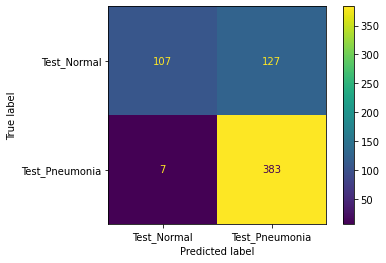

In [481]:
# Visualize with confusion matrix
preds = (best_model.predict(test_generator) > 0.5).astype('int32')

ConfusionMatrixDisplay(confusion_matrix(test_generator.labels, preds),
                       display_labels=['Test_Normal', 'Test_Pneumonia']).plot();

Woof. Well we definitely minimized false negatives...but maybe leaned too hard into that. :-/

Eric has one that has an accuracy of just over 80% and recall of 98.97%, so that will be our final model!